In [ ]:
import pde
import numpy as np
import h5py
from math import atan

import matplotlib.pyplot as plt

from IPython.display import Video

In [ ]:
def my_arctan(x):
    return np.arctan(x)       

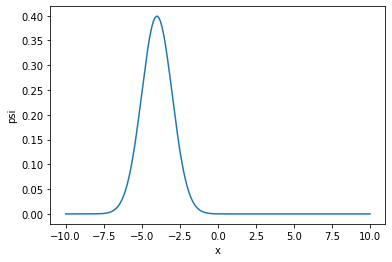

Total Probability:  [1.]


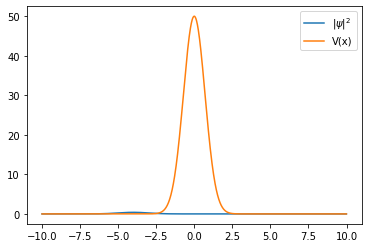

In [ ]:
## DEFINE EQUATION TO SIMULATE ##


potential = 'Gauss' # 'Gauss' or 'Arctan'

# Gaussian Potential

w0 = 1                     # omega for harmonic potential
m = 1                       # mass
mu0 = -4                    # center of initial gaussian wave-packet
hbar = 1                    # reduced plank constant

A = 50                       # Gaussian potential depth
Lambda = 1                  # Constant for gaussian potential
sigma = 1                   # Parameter for gaussian potential

a = 100                       # Parameter for arctan potential 
height = 100                 # Control the hight of the arctan

## DEFINE SPATIAL GRID ##

Nx = 1000 # number of spatial points
x_left = -10
x_right = 10

grid = pde.CartesianGrid([(x_left,x_right)], Nx, periodic=False)

dx = grid.discretization
x = grid.cell_coords.flatten()

if potential=='Gauss':
    f_name = f'barrier_A_{A}.h5'
    path = './Data/Simulations/'
    movie_name = f'barrier_A_{A}.mov'
    movie_path = './Data/Movie/'

    eq = pde.PDE({'psi':f'I*0.5*laplace(psi)/{m} - (0.5*{m}*{w0**2}*x**2)*I*psi - ({A}*exp(-{Lambda}*x**2))*I*psi'})
    V = (A*np.exp(-Lambda*x**2))  

elif potential=='Arctan':
    f_name = f'step_h_{height}_a_{a}.h5'
    path = './Data/Simulations/'
    movie_name = f'step_h_{height}_a{a}.mov'
    movie_path = './Data/Movie/'

    eq = pde.PDE({'psi':f'I*0.5*laplace(psi)/{m} - (0.5*{m}*{w0**2}*x**2)*I*psi - {height}*(pi/(2*{a})+(1/{a})*my_arctan({a}*x))*I*psi'}, user_funcs={'my_arctan':my_arctan})
    V = height*(np.pi/(2*a)+1/a*np.arctan(a*x)) 

else: raise ValueError()

## DEFINE INITIAL STATE ##

const = 1/(2*np.pi*sigma**2)**(1/4)
psi0 = const*np.exp(-(x-mu0)**2/(4*sigma**2))

initial_state = pde.ScalarField(grid=grid, data=psi0, label='psi')

initial_state.plot(scalar='norm_squared') # TODO: ADD LABELS 

print("Total Probability: ", np.sum(np.abs(initial_state.data)**2)*dx)


# Plot of i.c. & potential
plt.plot(x, np.abs(psi0)**2, label=r"$|\psi|^2$")
plt.plot(x,V, label='V(x)')
plt.legend()



In [ ]:
## SOLVE EQUATION ##

# define storage 
storage = pde.MemoryStorage() # for movie
file_storage = pde.FileStorage(filename=path+f_name) # dataset

# simulation time and step (1e-6 and 1e-5 seems to work, more testing needed to se if less can be used)
t_range = 5
dt_sim = 1e-5

# points to store to file
N_t_writing = 1000 # can be changed if more points are needed
dt_writing = t_range/N_t_writing

# points to use in animation 
N_t_anim = 500 # this is enough do not change it 
dt_anim = t_range/N_t_anim


solver = pde.ExplicitSolver(eq, scheme="runge-kutta", adaptive=False)
controller = pde.Controller(solver, t_range=t_range, tracker=['progress', storage.tracker(interval=dt_anim), file_storage.tracker(interval=dt_writing)])
_ = controller.run(initial_state, dt=dt_sim)



100%|██████████| 5.0/5.0 [03:12<00:00, 38.44s/it]


In [ ]:
## APPEND X DATA TO CREATED FILE ## 

file = h5py.File(path+f_name, 'a')
file.create_dataset('x', data=x)
file.close()

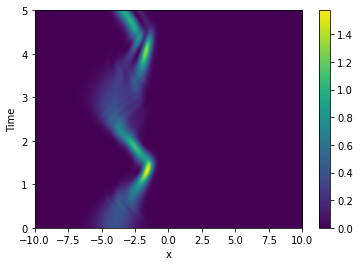

In [ ]:
## PLOT SOLUTIONS ##

pde.plot_kymograph(storage, scalar='norm_squared')

100%|██████████| 501/501 [01:42<00:00,  4.91it/s]


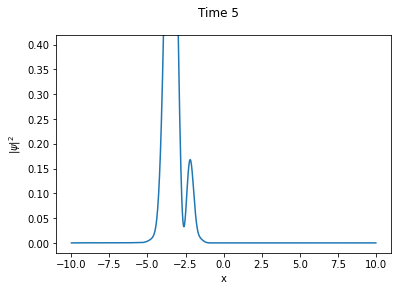

In [ ]:
## CREATE MOVIE ## 

pde.movie(storage, movie_path+movie_name, plot_args={'scalar':'norm_squared', 'ylabel':r"$|\psi|^2$"}) # TODO: ADD LABELS 

In [ ]:
## VISUALIZE MOVIE ## (not working on deepnote)

Video(movie_path+movie_name)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=964d390d-0269-41ab-86ee-4ee3752d1778' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>